In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

# Veri birleştirme
# Yolun tanımlanması
input_directory_path = '/content/drive/My Drive/Bitirme/window_it/'

# Tüm verileri tutacak boş bir liste
all_data = []

# Belirtilen dizindeki her CSV dosyasını tek tek oku ve DataFrame'e dönüştür
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_directory_path, file_name)
        df = pd.read_csv(file_path)
        all_data.append(df)

# Tek bir DataFrame olarak birleştir
combined_df = pd.concat(all_data, ignore_index=True)


In [ ]:
total_rows = combined_df.shape[0]
print(f'Total rows in combined_df: {total_rows}')


Total rows in combined_df: 26225


In [ ]:
print(f"combined_df head: {combined_df.head()}")
print(f"combined_df describe: {combined_df.describe()}")
# Veri kümenizin boyutunu gösteren satır
print(f"combined_df shape {combined_df.shape}")
print(f'Total rows in combined_df: {total_rows}')

combined_df head:                 start_time                 end_time  avg_fuel_consumption  \
0  2015-11-03 18:37:10.600  2015-11-03 18:42:10.600              0.000000   
1  2015-11-03 18:38:10.600  2015-11-03 18:43:10.600              0.000000   
4  2015-11-03 18:45:10.600  2015-11-03 18:50:10.600             51.691306   
5  2015-11-03 18:46:10.600  2015-11-03 18:51:10.600             13.119429   
6  2015-11-03 18:47:10.600  2015-11-03 18:52:10.600             15.608124   

   VehicleID_mean  HghRslutionTotalVehicleDistance_mean  \
0           172.0                          2.232866e+08   
1           172.0                          2.232866e+08   
4           172.0                          2.232866e+08   
5           172.0                          2.232867e+08   
6           172.0                          2.232870e+08   

   TachographVehicleSpeed_mean  EngSpeed_mean  ActualEngPercentTorque_mean  \
0                     2.685767     610.611357                     7.845133   
1       

In [ ]:
print(combined_df.dtypes)

start_time                               object
end_time                                 object
avg_fuel_consumption                    float64
VehicleID_mean                          float64
HghRslutionTotalVehicleDistance_mean    float64
TachographVehicleSpeed_mean             float64
EngSpeed_mean                           float64
ActualEngPercentTorque_mean             float64
AccelPedalPos1_mean                     float64
BrakePedalPos_mean                      float64
PCCM_Slope_mean                         float64
DStgy_dmRdcAgAct_mean                   float64
EngOilTemp1_mean                        float64
EngCoolantTemp_mean                     float64
GrossCombinationVehicleWeight_mean      float64
EngTotalFuelUsed_mean                   float64
VehicleID_std                           float64
HghRslutionTotalVehicleDistance_std     float64
TachographVehicleSpeed_std              float64
EngSpeed_std                            float64
ActualEngPercentTorque_std              

In [3]:
combined_df.dropna(inplace=True)

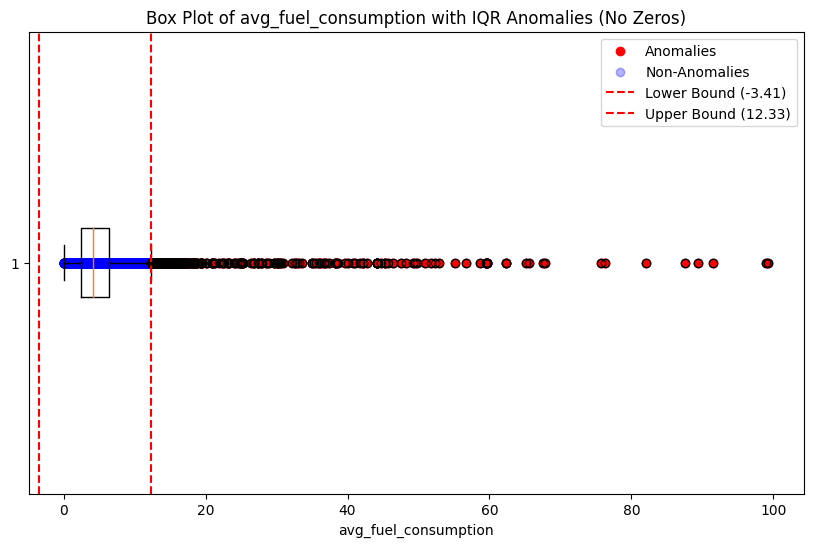

In [ ]:
import matplotlib.pyplot as plt
# Sıfır olan avg_fuel_consumption değerlerini çıkartalım
combined_df_non_zero = combined_df[combined_df['avg_fuel_consumption'] > 0]

# IQR hesaplaması
Q1 = combined_df_non_zero['avg_fuel_consumption'].quantile(0.25)
Q3 = combined_df_non_zero['avg_fuel_consumption'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırların belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Anomali olarak belirlenen veri noktalarını seçelim
anomalies = combined_df_non_zero[(combined_df_non_zero['avg_fuel_consumption'] < lower_bound) | (combined_df_non_zero['avg_fuel_consumption'] > upper_bound)]
non_anomalies = combined_df_non_zero[(combined_df_non_zero['avg_fuel_consumption'] >= lower_bound) & (combined_df_non_zero['avg_fuel_consumption'] <= upper_bound)]

# Box plot ve scatter plot oluşturulması
plt.figure(figsize=(10, 6))
plt.boxplot(combined_df_non_zero['avg_fuel_consumption'], vert=False)
plt.scatter(anomalies['avg_fuel_consumption'], [1] * len(anomalies), color='red', label='Anomalies')
plt.scatter(non_anomalies['avg_fuel_consumption'], [1] * len(non_anomalies), color='blue', alpha=0.3, label='Non-Anomalies')
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='r', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Box Plot of avg_fuel_consumption with IQR Anomalies (No Zeros)')
plt.xlabel('avg_fuel_consumption')
plt.legend()
plt.show()


In [ ]:

# Anomali olan ve olmayan veri noktalarının sayısını hesaplayalım
num_anomalies = len(anomalies)
num_non_anomalies = len(non_anomalies)

print(f"Number of anomalies: {num_anomalies}")
print(f"Number of non-anomalies: {num_non_anomalies}")


Number of anomalies: 795
Number of non-anomalies: 23593


In [ ]:
combined_df.describe()

,avg_fuel_consumption,VehicleID_mean,HghRslutionTotalVehicleDistance_mean,TachographVehicleSpeed_mean,EngSpeed_mean,ActualEngPercentTorque_mean,AccelPedalPos1_mean,BrakePedalPos_mean,PCCM_Slope_mean,DStgy_dmRdcAgAct_mean,...,EngSpeed_std,ActualEngPercentTorque_std,AccelPedalPos1_std,BrakePedalPos_std,PCCM_Slope_std,DStgy_dmRdcAgAct_std,EngOilTemp1_std,EngCoolantTemp_std,GrossCombinationVehicleWeight_std,EngTotalFuelUsed_std
count,25628.000000,25628.000000,2.562800e+04,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,...,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,25628.000000,2.562800e+04,25628.000000
mean,4.674994,79.183666,2.917125e+08,82.951332,1228.055356,31.724338,26.479797,1.405691,-0.142412,0.607061,...,139.352090,21.866907,20.052628,2.839342,1.255333,0.474349,0.013360,0.017921,6.171691e-04,0.088556
std,4.230346,52.300830,7.507719e+07,16.821317,170.747332,21.327382,27.799903,2.192824,1.425118,0.517130,...,110.422989,9.000984,14.679073,3.160477,0.757143,0.321330,0.011251,0.014088,2.104190e-03,0.065109
min,0.000000,1.000000,1.285761e+08,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.200948,34.000000,2.444331e+08,84.631030,1167.039873,15.309974,2.237720,0.000000,-0.980794,0.206968,...,40.564942,15.788705,5.882865,0.000000,0.774547,0.226401,0.005433,0.008161,5.562251e-17,0.037342
50%,3.873323,72.000000,2.808227e+08,88.283150,1210.406415,27.759541,17.549431,0.267611,0.000000,0.503285,...,124.874172,21.783957,20.672992,1.918680,1.305301,0.444734,0.009947,0.012335,1.312135e-04,0.074626
75%,6.272809,123.000000,3.373644e+08,89.945533,1301.067670,43.959280,41.923175,2.027827,0.556123,0.874822,...,206.123423,28.279462,32.088473,5.413847,1.709470,0.680114,0.017760,0.024447,4.405809e-04,0.126299
max,99.305655,187.000000,4.810344e+08,99.966096,2044.431818,97.587755,100.000000,15.514074,4.804688,3.479451,...,690.265889,46.626006,49.859002,18.422846,5.588528,1.643570,0.115991,0.171412,6.015344e-02,0.361071


Epoch 1/50
572/572 [==============================] - 32s 46ms/step - loss: 2.3179 - val_loss: 1.6216
Epoch 2/50
572/572 [==============================] - 20s 34ms/step - loss: 1.0903 - val_loss: 0.5781
Epoch 3/50
572/572 [==============================] - 21s 36ms/step - loss: 0.3011 - val_loss: 0.1123
Epoch 4/50
572/572 [==============================] - 22s 39ms/step - loss: 0.0535 - val_loss: 0.0202
Epoch 5/50
572/572 [==============================] - 21s 36ms/step - loss: 0.0115 - val_loss: 0.0050
Epoch 6/50
572/572 [==============================] - 19s 34ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7/50
572/572 [==============================] - 20s 36ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/50
572/572 [==============================] - 23s 39ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/50
572/572 [==============================] - 20s 34ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/50
572/572 [==============================] - 20s 36ms/step - loss: 0.001

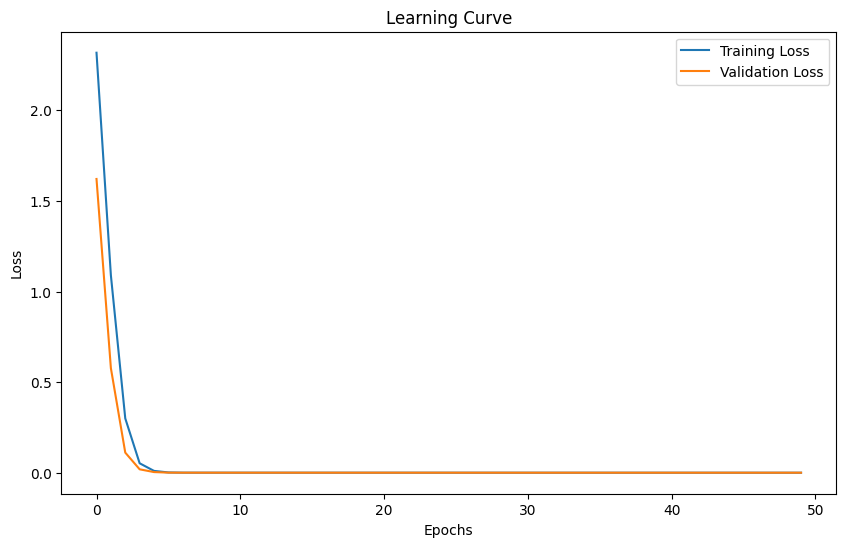

In [4]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

# Özelliklerin ve hedefin belirlenmesi
features = [
    'HghRslutionTotalVehicleDistance_mean', 'TachographVehicleSpeed_mean',
    'EngSpeed_mean', 'ActualEngPercentTorque_mean', 'AccelPedalPos1_mean',
    'BrakePedalPos_mean', 'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean',
    'EngOilTemp1_mean', 'EngCoolantTemp_mean', 'GrossCombinationVehicleWeight_mean',
    'EngTotalFuelUsed_mean'
]
target = 'avg_fuel_consumption'

# Anomali olmayan verileri filtreleme
combined_df_non_zero = combined_df[combined_df[target] > 0]

# Veri setinin hazırlanması
X = combined_df_non_zero[features].values
y = combined_df_non_zero[[target]].values

# Ölçeklendirme
scaler_X = StandardScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Zaman serisi verilerinin hazırlanması
window_size = 10
X_series = np.array([X_scaled[i : i + window_size] for i in range(len(X_scaled) - window_size)])
y_series = np.array([y_scaled[i + window_size] for i in range(len(y_scaled) - window_size)])

# Modelin tanımlanması
model = Sequential([
    LSTM(units=128, input_shape=(window_size, len(features)), return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(units=64, return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(units=32, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(units=1)
])

# Modelin derlenmesi
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modelin eğitilmesi
history = model.fit(X_series, y_series, epochs=50, batch_size=32, validation_split=0.25, callbacks=[early_stopping], shuffle=False)

# Tüm veri seti üzerinde tahmin yapma
y_pred = model.predict(X_series)

# Reconstruction error hesaplama
reconstruction_error = np.mean(np.abs(y_series - y_pred), axis=1)


# Eğitim ve doğrulama kaybının grafik üzerinde gösterilmesi
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Reconstruction error hesaplama
mse = np.mean(np.power(y_series - y_pred, 2), axis=1)

# MSE için istatistiksel özet
mse_summary = pd.Series(mse).describe()
print(mse_summary)


count    2.437800e+04
mean     1.219429e-03
std      1.605786e-02
min      5.628663e-17
25%      4.647034e-05
50%      1.952858e-04
75%      5.343852e-04
max      8.635771e-01
dtype: float64


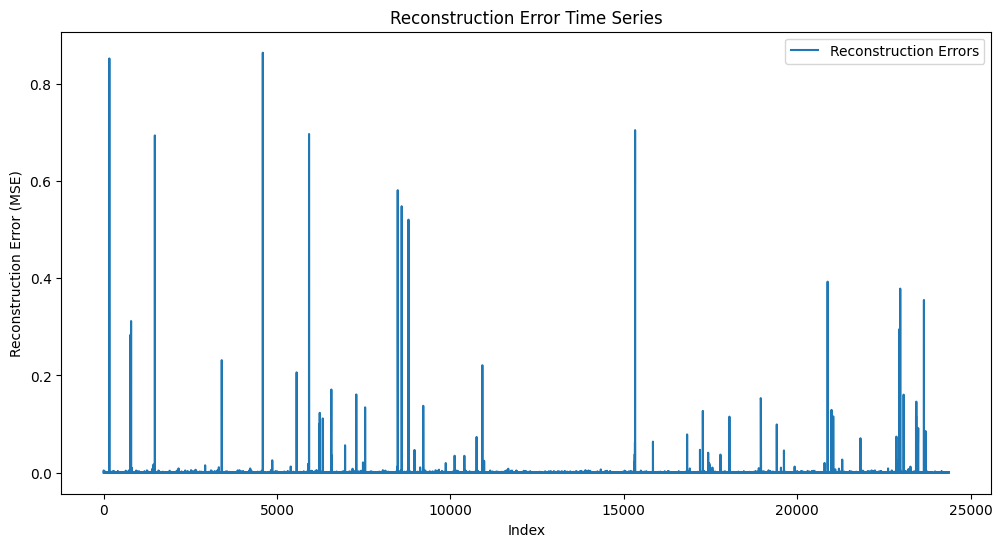

In [ ]:
# Reconstruction Error Time Series
plt.figure(figsize=(12, 6))
plt.plot(mse, label='Reconstruction Errors')
plt.xlabel('Index')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error Time Series')
plt.legend()
plt.show()


In [5]:
# Reconstruction error hesaplama
reconstruction_error = np.mean(np.abs(y_series - y_pred), axis=1)

# İlk window_size kadar veriyi çıkararak DataFrame'i eşleştir
adjusted_df = combined_df_non_zero.iloc[window_size:].copy()

# MSE'yi DataFrame'e ekleyin
adjusted_df['mse'] = reconstruction_error

# MSE'nin istatistiksel özetini alın
print(adjusted_df['mse'].describe())


count    2.437800e+04
mean     1.850711e-02
std      2.972413e-02
min      8.779213e-07
25%      7.141141e-03
50%      1.438502e-02
75%      2.323385e-02
max      9.291329e-01
Name: mse, dtype: float64


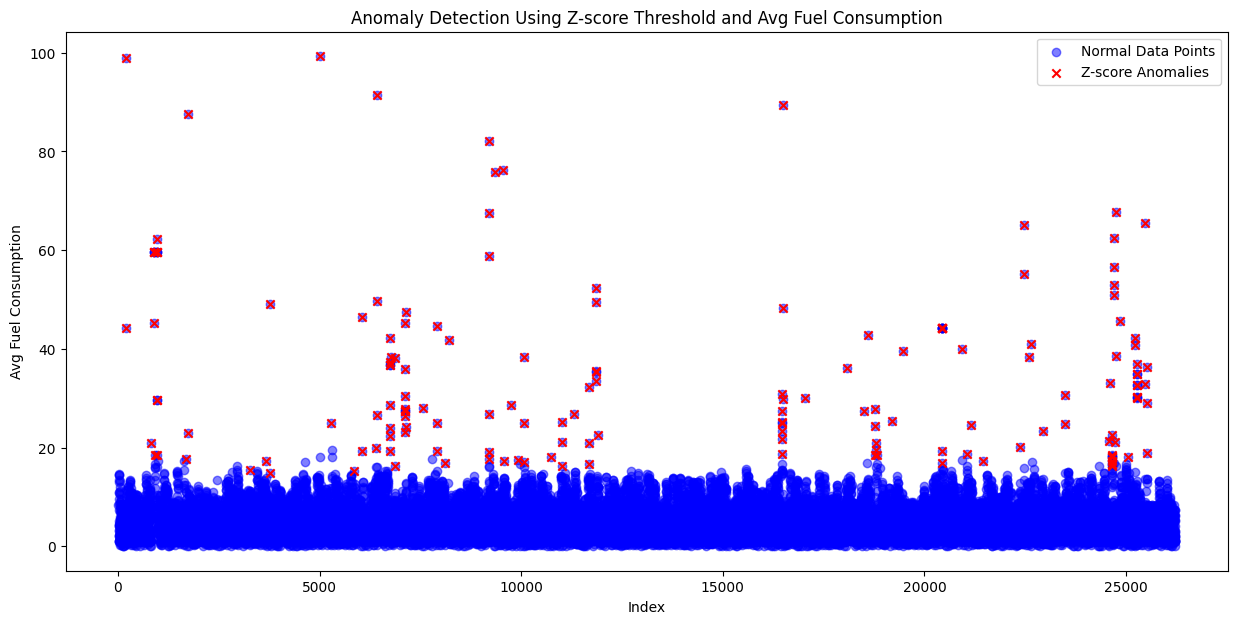

In [6]:
from scipy.stats import zscore

# Yeniden yapılandırma hataları için Z-score hesaplayın
reconstruction_errors_zscore = zscore(reconstruction_error)

# Z-score threshold belirleyin (örneğin, 3.0)
zscore_threshold = 3.0

# Z-score threshold ile anomali tespiti
zscore_anomalies = np.abs(reconstruction_errors_zscore) > zscore_threshold

# Anomali olanları işaretle
adjusted_df['is_anomaly_zscore'] = 0
adjusted_df.loc[zscore_anomalies, 'is_anomaly_zscore'] = 1

# Z-score threshold ile anomali tespiti sonuçlarını görselleştirme
plt.figure(figsize=(15, 7))
plt.scatter(adjusted_df.index, adjusted_df['avg_fuel_consumption'], c='blue', label='Normal Data Points', alpha=0.5)
plt.scatter(adjusted_df.index[adjusted_df['is_anomaly_zscore'] == 1], adjusted_df['avg_fuel_consumption'][adjusted_df['is_anomaly_zscore'] == 1], c='red', marker='x', label='Z-score Anomalies')
plt.title('Anomaly Detection Using Z-score Threshold and Avg Fuel Consumption')
plt.xlabel('Index')
plt.ylabel('Avg Fuel Consumption')
plt.legend()
plt.show()


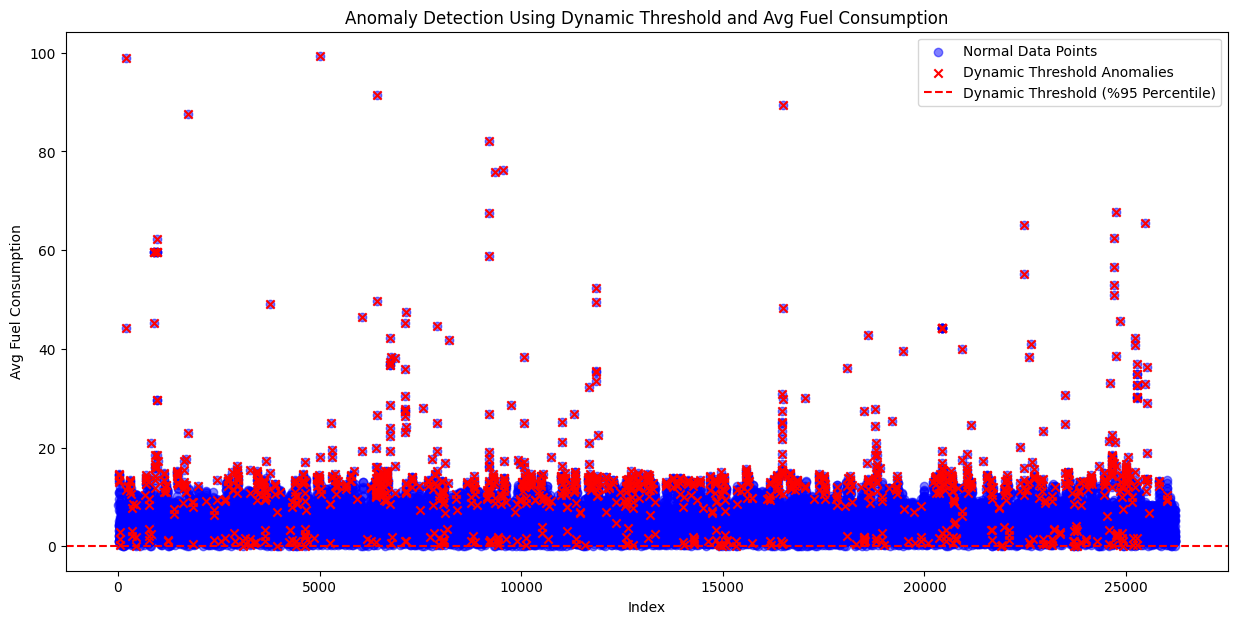

In [7]:
# Dinamik threshold belirleyin (örneğin, %95 persentil)
dynamic_threshold = np.percentile(reconstruction_error, 95)

# Dinamik threshold ile anomali tespiti
dynamic_anomalies = reconstruction_error > dynamic_threshold

# Anomali olanları işaretle
adjusted_df['is_anomaly_dynamic'] = 0
adjusted_df.loc[dynamic_anomalies, 'is_anomaly_dynamic'] = 1

# Dinamik threshold ile anomali tespiti sonuçlarını görselleştirme
plt.figure(figsize=(15, 7))
plt.scatter(adjusted_df.index, adjusted_df['avg_fuel_consumption'], c='blue', label='Normal Data Points', alpha=0.5)
plt.scatter(adjusted_df.index[adjusted_df['is_anomaly_dynamic'] == 1], adjusted_df['avg_fuel_consumption'][adjusted_df['is_anomaly_dynamic'] == 1], c='red', marker='x', label='Dynamic Threshold Anomalies')
plt.axhline(y=dynamic_threshold, color='red', linestyle='--', label='Dynamic Threshold (%95 Percentile)')
plt.title('Anomaly Detection Using Dynamic Threshold and Avg Fuel Consumption')
plt.xlabel('Index')
plt.ylabel('Avg Fuel Consumption')
plt.legend()
plt.show()


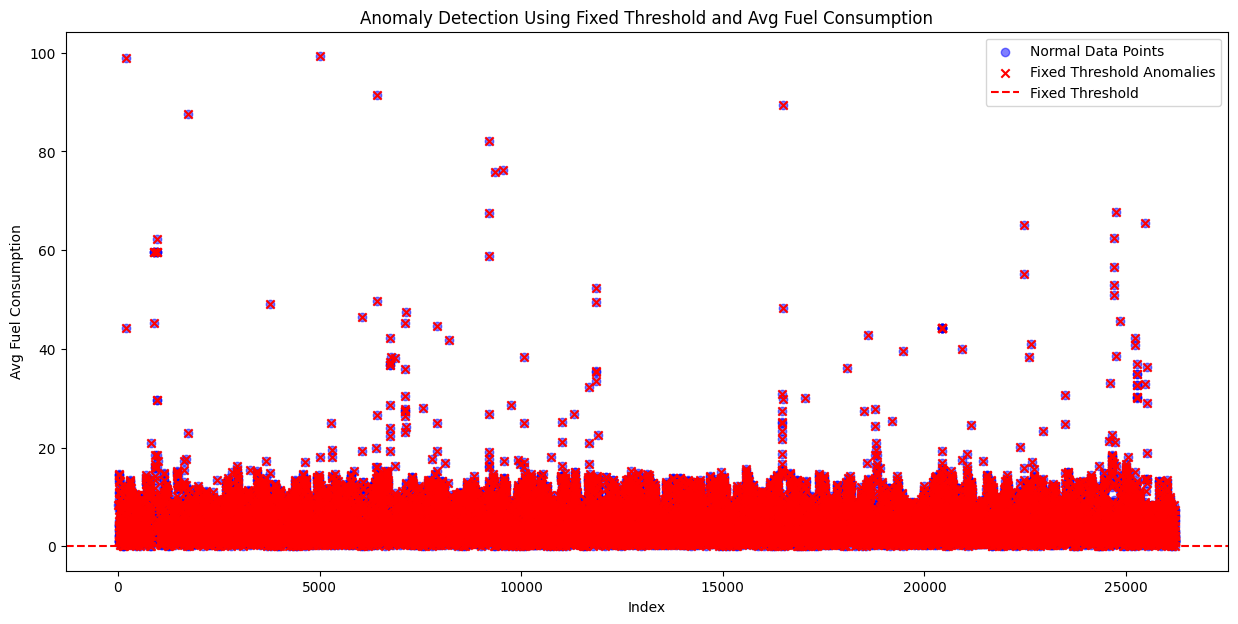

In [8]:
# Sabit bir threshold belirleyin
fixed_threshold = 0.01

# Sabit threshold ile anomali tespiti
fixed_anomalies = reconstruction_error > fixed_threshold

# Anomali olanları işaretle
adjusted_df['is_anomaly_fixed'] = 0
adjusted_df.loc[fixed_anomalies, 'is_anomaly_fixed'] = 1

# Sabit threshold ile anomali tespiti sonuçlarını görselleştirme
plt.figure(figsize=(15, 7))
plt.scatter(adjusted_df.index, adjusted_df['avg_fuel_consumption'], c='blue', label='Normal Data Points', alpha=0.5)
plt.scatter(adjusted_df.index[adjusted_df['is_anomaly_fixed'] == 1], adjusted_df['avg_fuel_consumption'][adjusted_df['is_anomaly_fixed'] == 1], c='red', marker='x', label='Fixed Threshold Anomalies')
plt.axhline(y=fixed_threshold, color='red', linestyle='--', label='Fixed Threshold')
plt.title('Anomaly Detection Using Fixed Threshold and Avg Fuel Consumption')
plt.xlabel('Index')
plt.ylabel('Avg Fuel Consumption')
plt.legend()
plt.show()


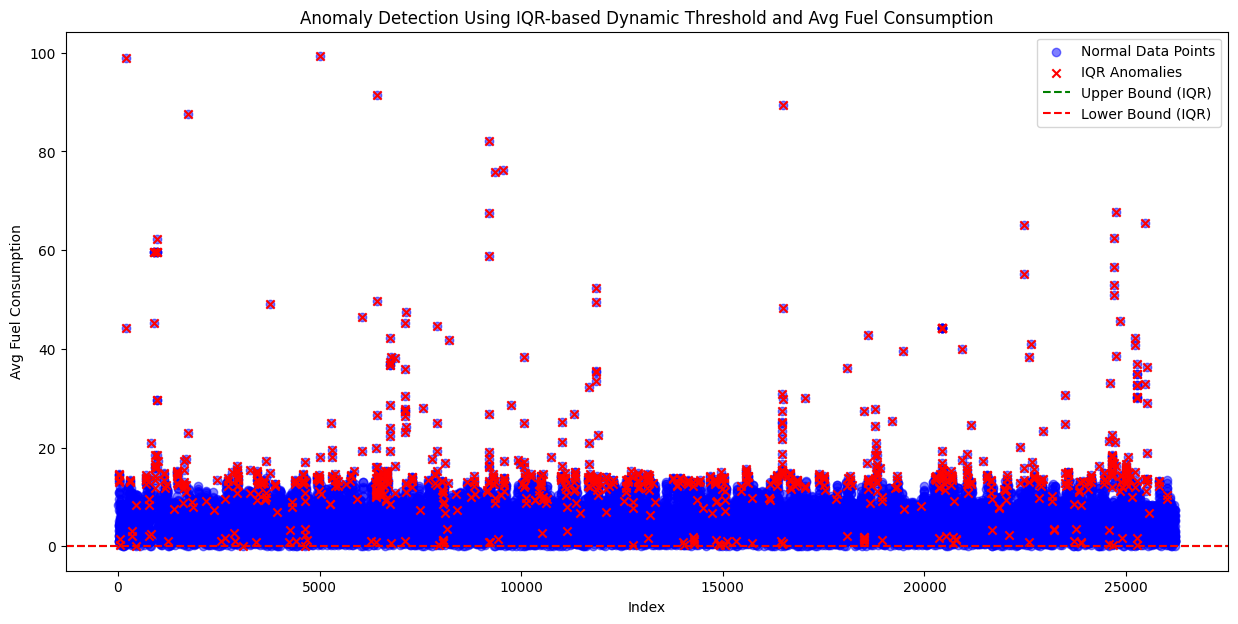

In [9]:
# IQR hesaplaması (mse üzerinden)
Q1 = np.percentile(reconstruction_error, 25)
Q3 = np.percentile(reconstruction_error, 75)
IQR = Q3 - Q1

# IQR tabanlı dinamik threshold belirleyin
iqr_threshold_upper = Q3 + 1.5 * IQR
iqr_threshold_lower = Q1 - 1.5 * IQR

# IQR threshold ile anomali tespiti
iqr_anomalies = (reconstruction_error > iqr_threshold_upper) | (reconstruction_error < iqr_threshold_lower)

# Anomali olanları işaretle
adjusted_df['is_anomaly_iqr'] = 0
adjusted_df.loc[iqr_anomalies, 'is_anomaly_iqr'] = 1

# IQR threshold ile anomali tespiti sonuçlarını görselleştirme
plt.figure(figsize=(15, 7))
plt.scatter(adjusted_df.index, adjusted_df['avg_fuel_consumption'], c='blue', label='Normal Data Points', alpha=0.5)
plt.scatter(adjusted_df.index[adjusted_df['is_anomaly_iqr'] == 1], adjusted_df['avg_fuel_consumption'][adjusted_df['is_anomaly_iqr'] == 1], c='red', marker='x', label='IQR Anomalies')
plt.axhline(y=iqr_threshold_upper, color='green', linestyle='--', label='Upper Bound (IQR)')
plt.axhline(y=iqr_threshold_lower, color='red', linestyle='--', label='Lower Bound (IQR)')
plt.title('Anomaly Detection Using IQR-based Dynamic Threshold and Avg Fuel Consumption')
plt.xlabel('Index')
plt.ylabel('Avg Fuel Consumption')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# LSTM'de belirlenen IQR anomalilerinin indekslerini içeren DataFrame'i oluşturma
lstm_iqr_anomalies_indices = adjusted_df[adjusted_df['is_anomaly_iqr'] == 1].index

# İndeksleri içeren DataFrame oluşturma
lstm_iqr_anomalies_df = pd.DataFrame(lstm_iqr_anomalies_indices, columns=['index'])

# CSV dosyasına kaydetme
lstm_iqr_anomalies_df.to_csv('/content/drive/My Drive/Bitirme/lstm_iqr_anomalies_indices.csv', index=False)


In [ ]:
# Save LSTM dynamic threshold anomalies indices to a CSV file
dynamic_anomalies_indices_lstm = adjusted_df[adjusted_df['is_anomaly_dynamic'] == 1].index
dynamic_anomalies_lstm_df = pd.DataFrame(dynamic_anomalies_indices_lstm, columns=['index'])
dynamic_anomalies_lstm_df.to_csv('/content/drive/My Drive/Bitirme/lstm_dynamic_anomalies_indices.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


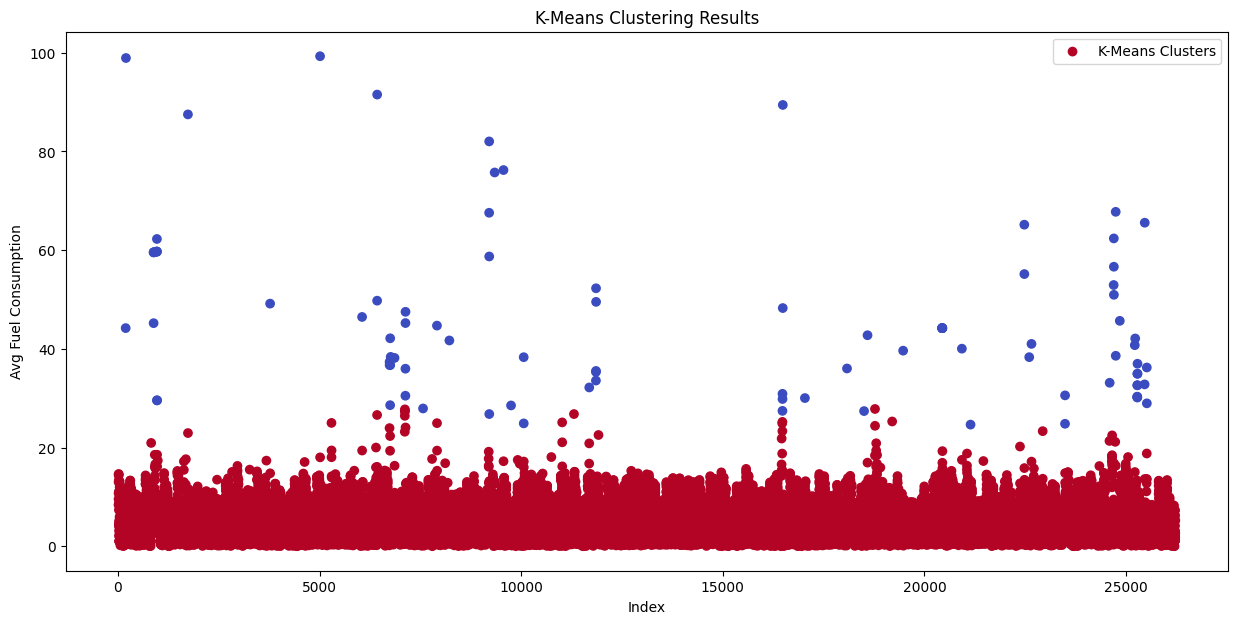

In [ ]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(reconstruction_error.reshape(-1, 1))

# K-Means Clustering sonuçlarını DataFrame'e ekleyin
adjusted_df['kmeans_cluster'] = kmeans_labels

# K-Means Clustering sonuçlarını görselleştirme
plt.figure(figsize=(15, 7))
plt.scatter(adjusted_df.index, adjusted_df['avg_fuel_consumption'], c=kmeans_labels, cmap='coolwarm', label='K-Means Clusters')
plt.title('K-Means Clustering Results')
plt.xlabel('Index')
plt.ylabel('Avg Fuel Consumption')
plt.legend()
plt.show()



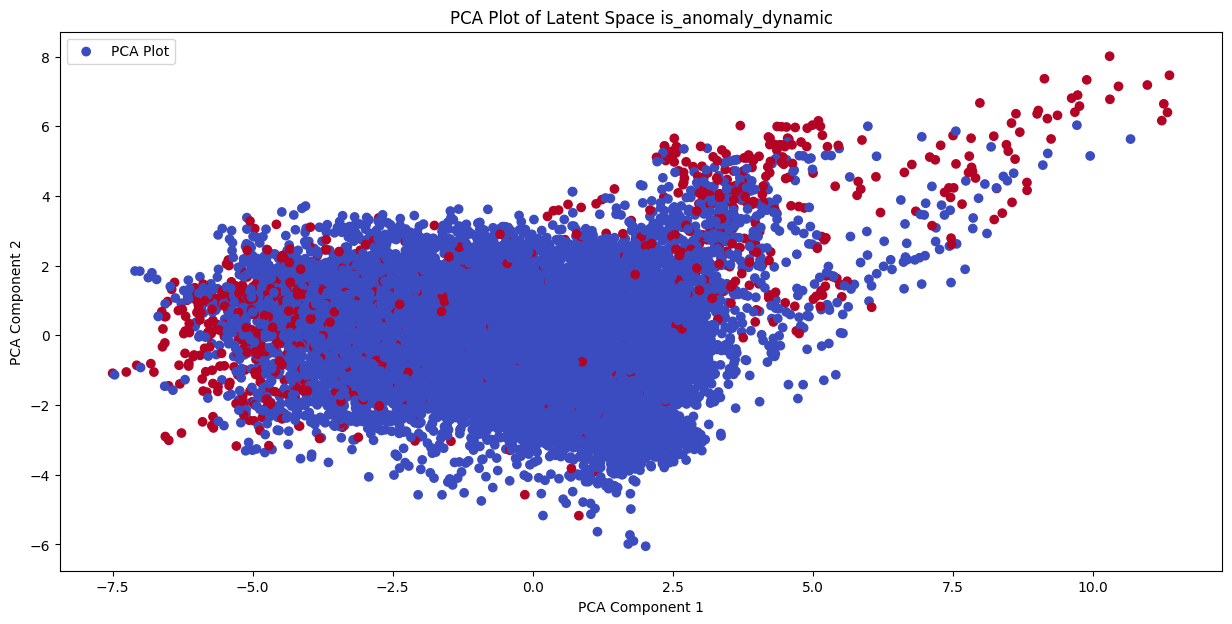

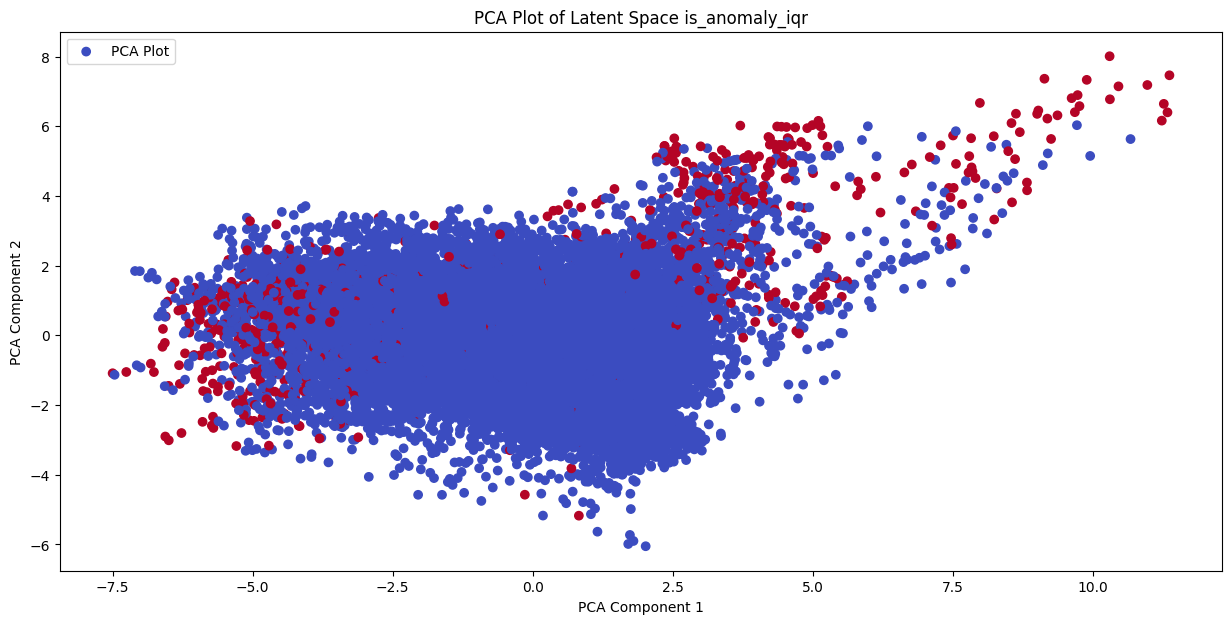

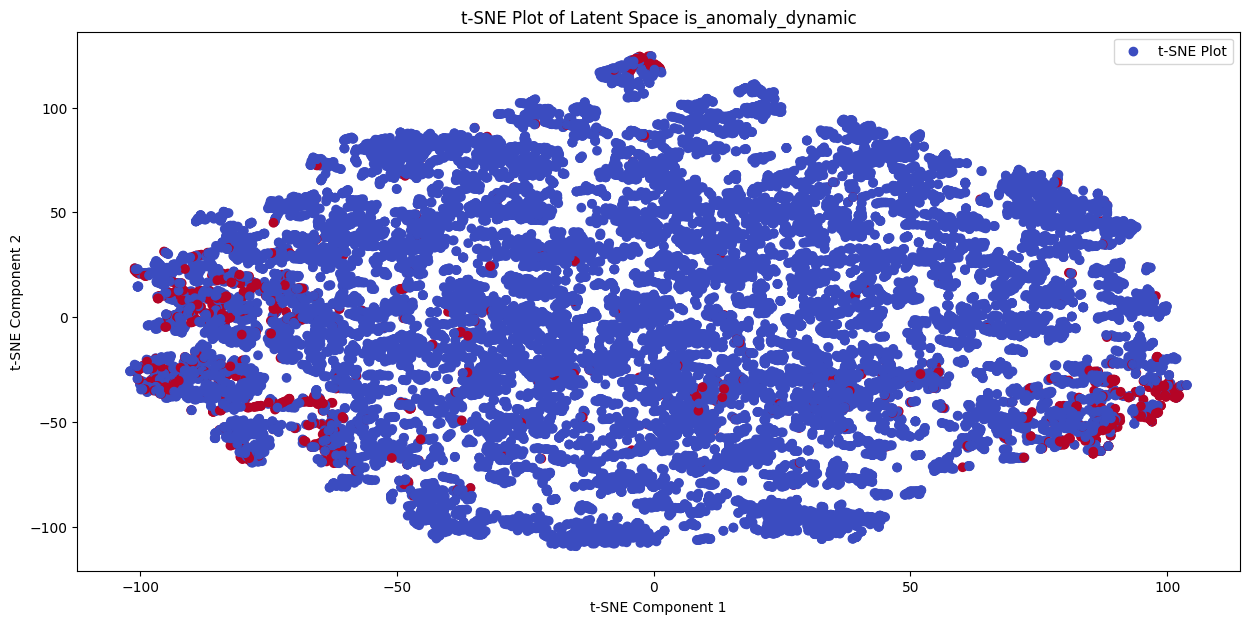

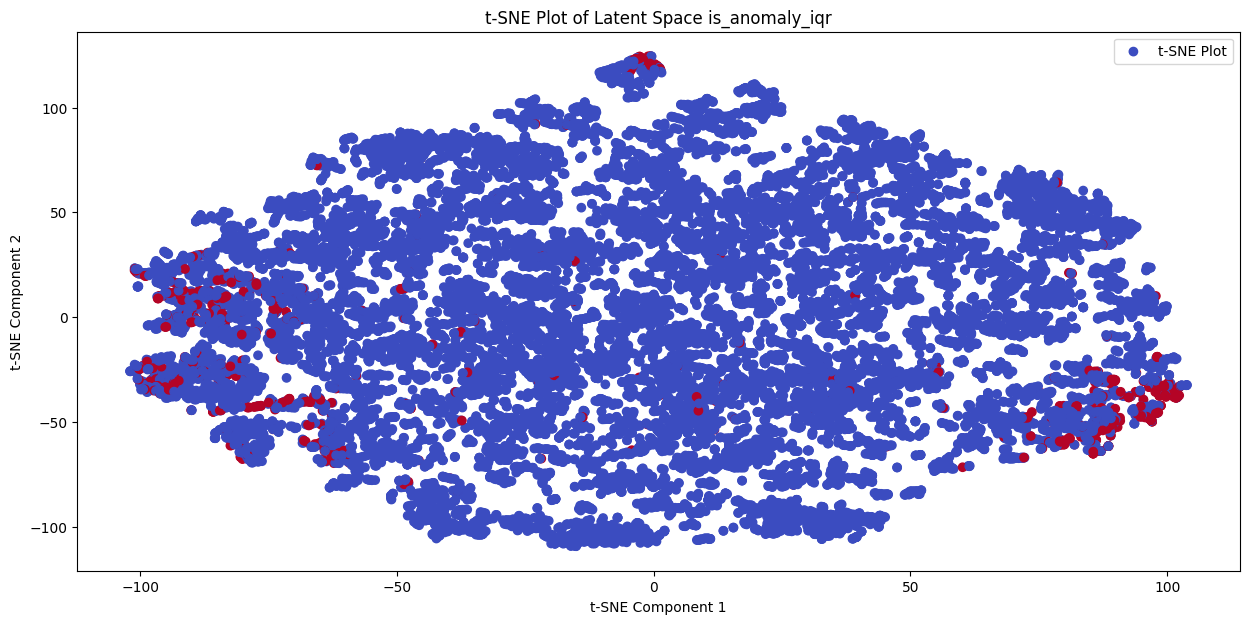

In [ ]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA Plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled[window_size:])
# PCA Plot for Dynamic Threshold
plt.figure(figsize=(15, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=adjusted_df['is_anomaly_dynamic'], cmap='coolwarm', label='PCA Plot')
plt.title('PCA Plot of Latent Space is_anomaly_dynamic')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# PCA Plot for IQR-based Threshold
plt.figure(figsize=(15, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=adjusted_df['is_anomaly_iqr'], cmap='coolwarm', label='PCA Plot')
plt.title('PCA Plot of Latent Space is_anomaly_iqr')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# t-SNE Plot for Dynamic Threshold
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled[window_size:])

plt.figure(figsize=(15, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=adjusted_df['is_anomaly_dynamic'], cmap='coolwarm', label='t-SNE Plot')
plt.title('t-SNE Plot of Latent Space is_anomaly_dynamic')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# t-SNE Plot for IQR-based Threshold
plt.figure(figsize=(15, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=adjusted_df['is_anomaly_iqr'], cmap='coolwarm', label='t-SNE Plot')
plt.title('t-SNE Plot of Latent Space is_anomaly_iqr')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [10]:
import pandas as pd

# Z-score Tabanlı Threshold ile Anomali Tespiti
zscore_anomalies_count = adjusted_df['is_anomaly_zscore'].sum()
zscore_normal_count = len(adjusted_df) - zscore_anomalies_count
zscore_anomaly_percentage = (zscore_anomalies_count / len(adjusted_df)) * 100
zscore_normal_percentage = 100 - zscore_anomaly_percentage

# Dinamik Threshold (Percentile Tabanlı) ile Anomali Tespiti
dynamic_anomalies_count = adjusted_df['is_anomaly_dynamic'].sum()
dynamic_normal_count = len(adjusted_df) - dynamic_anomalies_count
dynamic_anomaly_percentage = (dynamic_anomalies_count / len(adjusted_df)) * 100
dynamic_normal_percentage = 100 - dynamic_anomaly_percentage

# Sabit Threshold ile Anomali Tespiti
fixed_anomalies_count = adjusted_df['is_anomaly_fixed'].sum()
fixed_normal_count = len(adjusted_df) - fixed_anomalies_count
fixed_anomaly_percentage = (fixed_anomalies_count / len(adjusted_df)) * 100
fixed_normal_percentage = 100 - fixed_anomaly_percentage

# IQR Tabanlı Threshold ile Anomali Tespiti
iqr_anomalies_count = adjusted_df['is_anomaly_iqr'].sum()
iqr_normal_count = len(adjusted_df) - iqr_anomalies_count
iqr_anomaly_percentage = (iqr_anomalies_count / len(adjusted_df)) * 100
iqr_normal_percentage = 100 - iqr_anomaly_percentage

# Sonuçları DataFrame olarak göstermek
summary_df = pd.DataFrame({
    'Method': ['Z-score Tabanlı', 'Dinamik Threshold', 'Sabit Threshold', 'IQR Tabanlı'],
    'Anomaly Count': [zscore_anomalies_count, dynamic_anomalies_count, fixed_anomalies_count, iqr_anomalies_count],
    'Normal Count': [zscore_normal_count, dynamic_normal_count, fixed_normal_count, iqr_normal_count],
    'Anomaly Percentage (%)': [zscore_anomaly_percentage, dynamic_anomaly_percentage, fixed_anomaly_percentage, iqr_anomaly_percentage],
    'Normal Percentage (%)': [zscore_normal_percentage, dynamic_normal_percentage, fixed_normal_percentage, iqr_normal_percentage]
})

print(summary_df)


              Method  Anomaly Count  Normal Count  Anomaly Percentage (%)  \
0    Z-score Tabanlı            163         24215                0.668636   
1  Dinamik Threshold           1219         23159                5.000410   
2    Sabit Threshold          15785          8593               64.751005   
3        IQR Tabanlı            857         23521                3.515465   

   Normal Percentage (%)  
0              99.331364  
1              94.999590  
2              35.248995  
3              96.484535  


In [12]:
# Save LSTM IQR Anomalies Indices
iqr_anomalies_indices_lstm = adjusted_df[adjusted_df['is_anomaly_iqr'] == 1].index
pd.DataFrame(iqr_anomalies_indices_lstm).to_csv('/content/drive/My Drive/Bitirme/lstm_iqr_anomalies1.csv', index=False)

# Save LSTM Dynamic Threshold Anomalies Indices
dynamic_anomalies_indices_lstm = adjusted_df[adjusted_df['is_anomaly_dynamic'] == 1].index
pd.DataFrame(dynamic_anomalies_indices_lstm).to_csv('/content/drive/My Drive/Bitirme/lstm_dynamic_anomalies1.csv', index=False)



In [ ]:
# IQR threshold ile anomali olan VehicleID_mean değerleri
vehicle_ids_iqr_lstm = adjusted_df[adjusted_df['is_anomaly_iqr'] == 1]['VehicleID_mean'].unique()
print("IQR Threshold ile Anomali Olan VehicleID_mean Değerleri (LSTM):", vehicle_ids_iqr_lstm)

IQR Threshold ile Anomali Olan VehicleID_mean Değerleri (LSTM): [172.  42. 139.  49. 151.   7. 106. 124.  69.  13.  61. 112.  29.  20.
 100. 108.  90.  33.  81.  99.  44.  28.  91.  88.  46. 149.  60.  56.
 132.  75. 150. 129.   5. 166. 147.  57.   9. 134.   6. 138. 156. 148.
 165.  38.  45.  43.  39.  47. 130. 143. 125. 142. 140.  15.  87.  89.
 113. 107.  34.  17.  97.  31.  32. 180. 176. 118. 102. 119.  86.  82.
 101.  30. 105.  35.  24. 177.  96.  93. 182.  16. 117.  22.  37.  95.
 175. 185. 114. 111.  21.  83.  94.  18. 184.  84.  25. 103.  14.  78.
 136. 173.  10. 164.  73. 128.  55. 120.  59.  63. 161. 145. 167.  50.
   4. 163. 121. 153.   1. 159.  67. 141. 168.  48.  52. 152. 158.  66.
 160.  51. 170.  54. 171. 144.]


In [ ]:
vehicle_ids_dynamic_lstm = adjusted_df[adjusted_df['is_anomaly_dynamic'] == 1]['VehicleID_mean'].unique()
print("Dynamic Threshold ile Anomali Olan VehicleID_mean Değerleri (LSTM):", vehicle_ids_dynamic_lstm)

Dynamic Threshold ile Anomali Olan VehicleID_mean Değerleri (LSTM): [172.  42. 151. 139.  49.   7. 106. 124.  69.  13.  61.  56. 112.  29.
  20.  94. 100. 108.  90.  33.  81.  99.  44.  28.  91.  88.  46. 149.
  60. 132.  75. 150. 129.   5. 166. 147.  57.   9. 134.   6. 138. 156.
 148.  62. 165. 140.  38.  45.  43.  39.  47. 130. 143.  53. 125. 142.
  15.  87.  89. 113. 107.  34.  17.  97.  31.  32. 180. 176. 118. 102.
 119.  86.  82. 101.  30. 105.  35.  24. 177.  96.  93. 182.  16. 117.
  22.  37.  95.  79. 181. 175. 185. 114. 111.  21.  83.  18. 184.  84.
  25. 103.  85.  14.  36.  78. 136. 173.  10.  64. 164. 169.  73. 128.
  55. 120.  59.  63. 161. 157.  65. 145. 167.  50.   4.  72. 163. 121.
 153.   1. 159.  67.  51. 141. 127. 144. 168.  48.  52.   2. 152.  54.
 158.  66. 160. 123. 170. 171.]


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Check the min and max values in the adjusted_df
min_value_adjusted_df = adjusted_df['GrossCombinationVehicleWeight_mean'].min()
max_value_adjusted_df = adjusted_df['GrossCombinationVehicleWeight_mean'].max()

print(f"Overall Minimum Gross Combination Vehicle Weight in adjusted_df: {min_value_adjusted_df}")
print(f"Overall Maximum Gross Combination Vehicle Weight in adjusted_df: {max_value_adjusted_df}")

# Check the min and max values in the high IQR anomalies DataFrame
min_value_high_iqr = high_iqr_anomalies['GrossCombinationVehicleWeight_mean'].min()
max_value_high_iqr = high_iqr_anomalies['GrossCombinationVehicleWeight_mean'].max()

print(f"Minimum Gross Combination Vehicle Weight in high IQR anomalies: {min_value_high_iqr}")
print(f"Maximum Gross Combination Vehicle Weight in high IQR anomalies: {max_value_high_iqr}")


Overall Minimum Gross Combination Vehicle Weight in adjusted_df: 0.0004502007572757
Overall Maximum Gross Combination Vehicle Weight in adjusted_df: 0.9975864325733244
Minimum Gross Combination Vehicle Weight in high IQR anomalies: 0.1459037731681089
Maximum Gross Combination Vehicle Weight in high IQR anomalies: 0.9875429548720506


In [ ]:
min_value_adjusted_df = adjusted_df['TachographVehicleSpeed_mean'].min()
max_value_adjusted_df = adjusted_df['TachographVehicleSpeed_mean'].max()

print(f"Overall Minimum Gross Combination Vehicle Weight in adjusted_df: {min_value_adjusted_df}")
print(f"Overall Maximum Gross Combination Vehicle Weight in adjusted_df: {max_value_adjusted_df}")

Overall Minimum Gross Combination Vehicle Weight in adjusted_df: 0.0
Overall Maximum Gross Combination Vehicle Weight in adjusted_df: 98.36265024162088


In [ ]:
total_features = len(features) * window_size  # Adjust this if features are repeated per timestep

# Verify that your reshaping matches the feature names count
flat_X = X_series.reshape(-1, total_features)
print(flat_X.shape[1])
# Select indices for multiple anomalies
anomaly_indices = dynamic_anomaly_indices  # or any subset you're interested in



120


In [ ]:
# Ensure only numeric columns are included
numeric_df = adjusted_df.select_dtypes(include=[float, int])

# Checking which columns are numeric
print(numeric_df.columns)


Index(['avg_fuel_consumption', 'VehicleID_mean',
       'HghRslutionTotalVehicleDistance_mean', 'TachographVehicleSpeed_mean',
       'EngSpeed_mean', 'ActualEngPercentTorque_mean', 'AccelPedalPos1_mean',
       'BrakePedalPos_mean', 'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean',
       'EngOilTemp1_mean', 'EngCoolantTemp_mean',
       'GrossCombinationVehicleWeight_mean', 'EngTotalFuelUsed_mean',
       'VehicleID_std', 'HghRslutionTotalVehicleDistance_std',
       'TachographVehicleSpeed_std', 'EngSpeed_std',
       'ActualEngPercentTorque_std', 'AccelPedalPos1_std', 'BrakePedalPos_std',
       'PCCM_Slope_std', 'DStgy_dmRdcAgAct_std', 'EngOilTemp1_std',
       'EngCoolantTemp_std', 'GrossCombinationVehicleWeight_std',
       'EngTotalFuelUsed_std', 'mse', 'is_anomaly_dynamic', 'is_anomaly_iqr'],
      dtype='object')


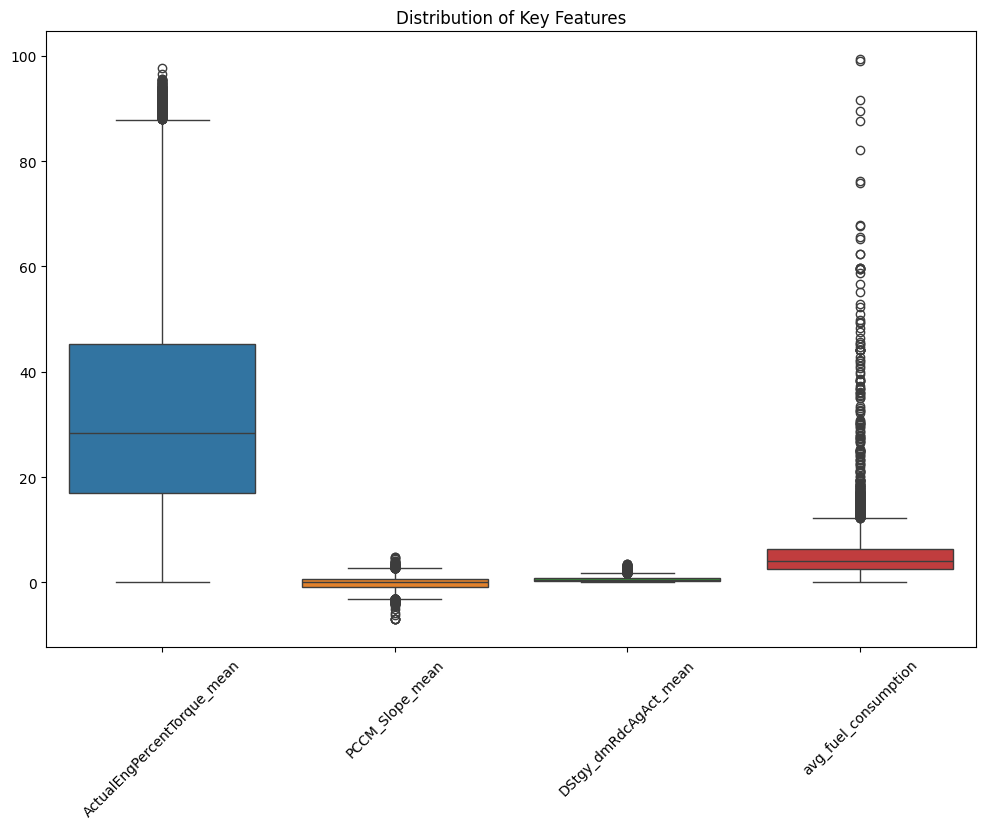

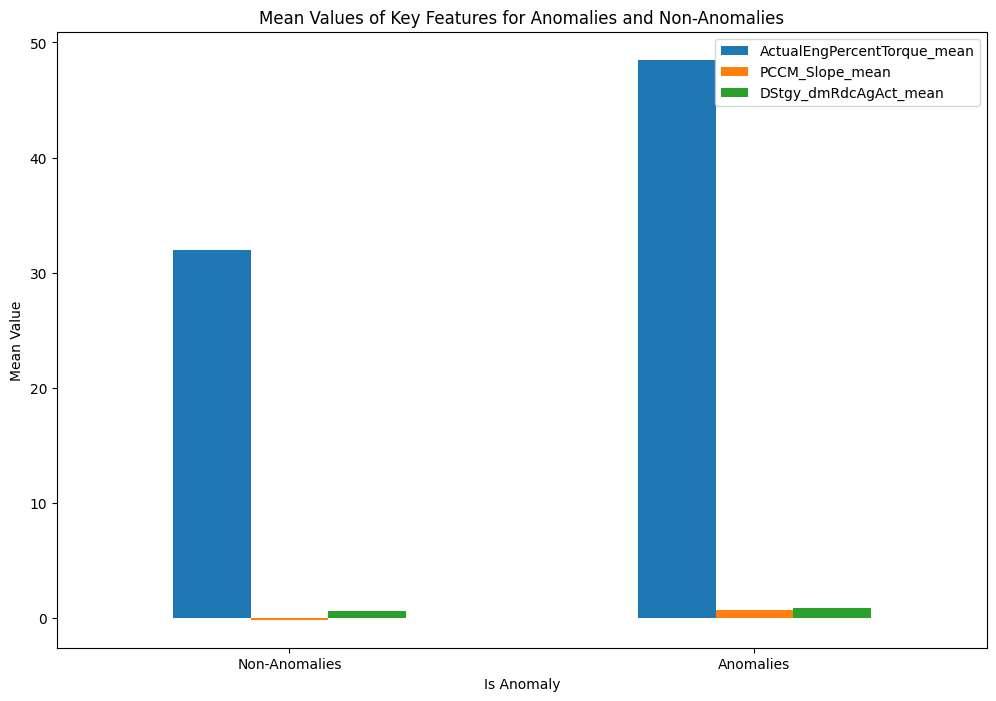

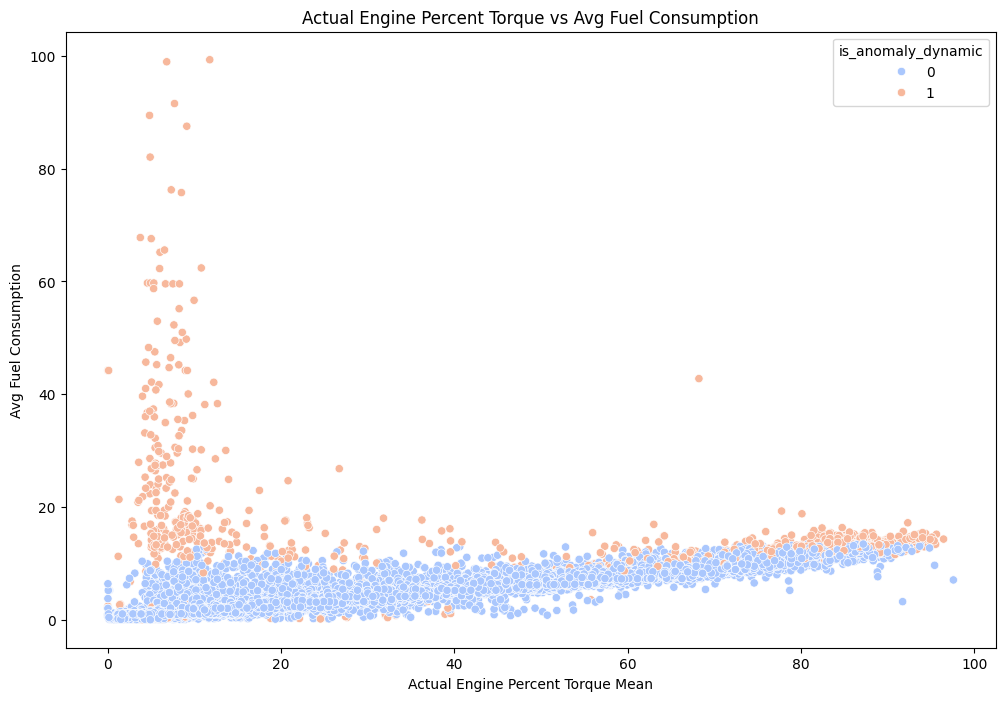

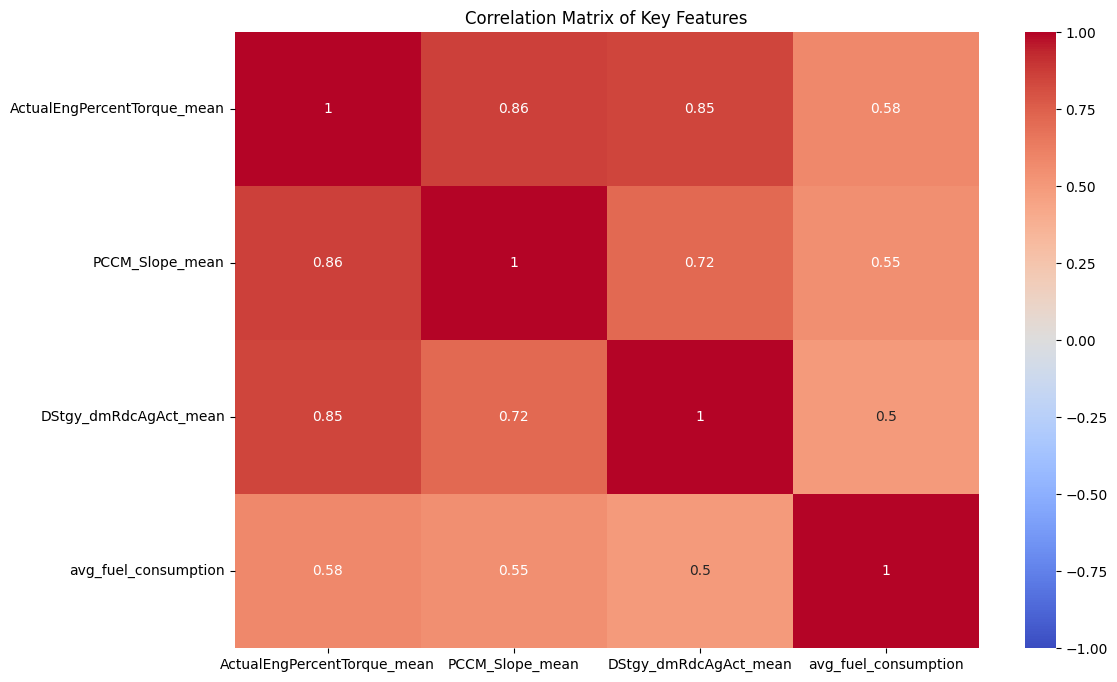

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly and normal data separation
anomalies_dynamic = numeric_df[numeric_df['is_anomaly_dynamic'] == 1]
non_anomalies_dynamic = numeric_df[numeric_df['is_anomaly_dynamic'] == 0]

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df[['ActualEngPercentTorque_mean', 'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean', 'avg_fuel_consumption']])
plt.title('Distribution of Key Features')
plt.xticks(rotation=45)
plt.show()

# Mean values of key features for anomalies and non-anomalies
feature_means = numeric_df.groupby('is_anomaly_dynamic').mean()[['ActualEngPercentTorque_mean', 'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean']]
feature_means.plot(kind='bar', figsize=(12, 8))
plt.title('Mean Values of Key Features for Anomalies and Non-Anomalies')
plt.xlabel('Is Anomaly')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Non-Anomalies', 'Anomalies'], rotation=0)
plt.legend(loc='upper right')
plt.show()

# Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=numeric_df, x='ActualEngPercentTorque_mean', y='avg_fuel_consumption', hue='is_anomaly_dynamic', palette='coolwarm')
plt.title('Actual Engine Percent Torque vs Avg Fuel Consumption')
plt.xlabel('Actual Engine Percent Torque Mean')
plt.ylabel('Avg Fuel Consumption')
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df[['ActualEngPercentTorque_mean', 'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean', 'avg_fuel_consumption']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Features')
plt.show()


In [ ]:
# Assuming 'adjusted_df' is the DataFrame with your anomalies and features
# And 'is_anomaly_dynamic' is the column indicating dynamic anomalies
top_5_anomalies = adjusted_df[adjusted_df['is_anomaly_dynamic'] == 1] \
    .nlargest(5, 'avg_fuel_consumption')  # Replace 'avg_fuel_consumption' with your specific column name if different

# Get the indices of these top anomalies
top_5_indices = top_5_anomalies.index.tolist()

In [ ]:
# Store explanations for top 5 anomalies
top_5_explanations = []

# Explain instances
for idx in top_5_indices:
    try:
        data_row = X_series[idx].flatten()
        exp = explainer.explain_instance(
            data_row=data_row,
            predict_fn=lambda x: model.predict(x.reshape(-1, window_size, len(features))),
            num_features=10  # This can be adjusted to focus on top contributing features
        )
        top_5_explanations.append(exp.as_list())
    except Exception as e:
        print(f"Error explaining index {idx}: {e}")

# Display explanations
for idx, explanation in zip(top_5_indices, top_5_explanations):
    print(f"Explanation for index {idx}:")
    for feature, impact in explanation:
        print(f"  {feature}: {impact}")
    print("\n")


157/157 [==============================] - 3s 19ms/step
Intercept 0.046789852854681874
Prediction_local [0.06202618]
Right: 0.06902157
157/157 [==============================] - 5s 33ms/step
Intercept 0.05209926982215873
Prediction_local [0.0468928]
Right: 0.04100766
157/157 [==============================] - 2s 11ms/step
Intercept 0.05225797746807373
Prediction_local [0.04469537]
Right: 0.039485358
157/157 [==============================] - 2s 10ms/step
Intercept 0.0426285274362118
Prediction_local [0.07416441]
Right: 0.070071146
157/157 [==============================] - 2s 10ms/step
Intercept 0.04228872421427024
Prediction_local [0.07583109]
Right: 0.086739376
Explanation for index 5013:
  ActualEngPercentTorque_mean > 0.59: 0.006660740503282856
  ActualEngPercentTorque_mean > 0.59: 0.005832745846484048
  ActualEngPercentTorque_mean > 0.59: 0.00403792316580025
  ActualEngPercentTorque_mean > 0.59: 0.0038426841541129115
  ActualEngPercentTorque_mean > 0.59: -0.002721604505303894
  Ac

In [ ]:
# List of indices for high and low fuel consumption anomalies
high_indices = [5013, 199, 6429, 16489, 1736]  # Replace with actual indices from your high anomalies
low_indices = [14981, 23717, 4425,783,3093]  # Replace with actual indices from your low anomalies

# Function to fetch VehicleID_mean values for given indices
def fetch_vehicle_ids(df, indices):
    # Extract VehicleID_mean values for the specified indices
    vehicle_ids = df.loc[indices, 'VehicleID_mean']
    return vehicle_ids

# Fetch VehicleID_mean for high consumption anomalies
high_anomaly_vehicle_ids = fetch_vehicle_ids(adjusted_df, high_indices)
print("Vehicle IDs for High Consumption Anomalies:")
print(high_anomaly_vehicle_ids)

# Fetch VehicleID_mean for low consumption anomalies
low_anomaly_vehicle_ids = fetch_vehicle_ids(adjusted_df, low_indices)
print("\nVehicle IDs for Low Consumption Anomalies:")
print(low_anomaly_vehicle_ids)


Vehicle IDs for High Consumption Anomalies:
5013       9.0
199       42.0
6429      45.0
16489    114.0
1736      29.0
Name: VehicleID_mean, dtype: float64

Vehicle IDs for Low Consumption Anomalies:
14981     37.0
23717    152.0
4425       5.0
783      106.0
3093      88.0
Name: VehicleID_mean, dtype: float64


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b7a2672ff0326feba1bef3184b8d9b26f7b1ea1564b8c5be866d8076b4222ae3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Assuming 'adjusted_df' is the DataFrame with your anomalies and features
# And 'is_anomaly_dynamic' is the column indicating dynamic anomalies
bottom_5_anomalies = adjusted_df[adjusted_df['is_anomaly_dynamic'] == 1] \
    .nsmallest(5, 'avg_fuel_consumption')  # Assuming 'avg_fuel_consumption' is the correct column name

# Get the indices of these bottom anomalies
bottom_5_indices = bottom_5_anomalies.index.tolist()
# Store explanations for bottom 5 anomalies
bottom_5_explanations = []

# Explain instances
for idx in bottom_5_indices:
    try:
        data_row = X_series[idx].flatten()
        exp = explainer.explain_instance(
            data_row=data_row,
            predict_fn=lambda x: model.predict(x.reshape(-1, window_size, len(features))),
            num_features=10  # This can be adjusted to focus on top contributing features
        )
        bottom_5_explanations.append(exp.as_list())
    except Exception as e:
        print(f"Error explaining index {idx}: {e}")

# Display explanations
for idx, explanation in zip(bottom_5_indices, bottom_5_explanations):
    print(f"Explanation for index {idx}:")
    for feature, impact in explanation:
        print(f"  {feature}: {impact}")
    print("\n")


157/157 [==============================] - 3s 17ms/step
Intercept 0.04755673444990399
Prediction_local [0.05879935]
Right: 0.048787203
157/157 [==============================] - 4s 25ms/step
Intercept 0.04603570201589436
Prediction_local [0.0638208]
Right: 0.053428844
157/157 [==============================] - 3s 17ms/step
Intercept 0.055530242384481676
Prediction_local [0.03528088]
Right: 0.016589079
157/157 [==============================] - 3s 17ms/step
Intercept 0.05158554206443221
Prediction_local [0.04716212]
Right: 0.060713254
157/157 [==============================] - 2s 16ms/step
Intercept 0.04844784612470341
Prediction_local [0.05594155]
Right: 0.054140124
Explanation for index 14981:
  TachographVehicleSpeed_mean <= 0.06: 0.0037188891693383567
  TachographVehicleSpeed_mean <= 0.06: 0.0027949376488516356
  TachographVehicleSpeed_mean <= 0.06: 0.0025894117020603007
  TachographVehicleSpeed_mean <= 0.06: 0.0024042788136831475
  GrossCombinationVehicleWeight_mean <= -0.83: -0.00

In [ ]:
# Identify high IQR anomalies
iqr_anomalies = (reconstruction_error > iqr_threshold_upper) | (reconstruction_error < iqr_threshold_lower)
adjusted_df['is_anomaly_iqr'] = 0
adjusted_df.loc[iqr_anomalies, 'is_anomaly_iqr'] = 1

# Filter for high IQR anomalies and sort by 'avg_fuel_consumption'
high_iqr_anomalies = adjusted_df[adjusted_df['is_anomaly_iqr'] == 1]
top_5_high_iqr_anomalies = high_iqr_anomalies.nlargest(5, 'avg_fuel_consumption')
top_5_high_iqr_indices = top_5_high_iqr_anomalies.index.tolist()


In [ ]:
from lime import lime_tabular

# Flatten the time series data into one long feature vector per instance
X_flattened = X_series.reshape(X_series.shape[0], -1)  # Convert (24378, 10, 12) into (24378, 120)

# Update feature names to reflect this transformation
new_feature_names = [f'{feat}_t{t}' for t in range(X_series.shape[1]) for feat in features]

# Initialize the LIME explainer with the flattened data
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_flattened,  # Flattened data
    feature_names=new_feature_names,  # Updated feature names
    mode='regression',
    verbose=True
)


In [ ]:
# Function to explain the top 5 high IQR anomalies
def explain_instances(indices, explainer, model, num_features=10):
    explanations = {}
    for idx in indices:
        # Get the instance to explain, ensuring it's a 1D array
        instance = X_flattened[idx]
        # Generate LIME explanation
        exp = explainer.explain_instance(
            data_row=instance,  # Directly use the 1D array
            predict_fn=lambda x: model.predict(x.reshape(-1, 10, 12)),  # Reshape back to (batch_size, window_size, num_features)
            num_features=num_features
        )
        explanations[idx] = exp.as_list()
    return explanations

# Get explanations for the top 5 high IQR anomalies
top_5_high_iqr_explanations = explain_instances(top_5_high_iqr_indices, explainer, model)

# Display the explanations
for idx, explanation in top_5_high_iqr_explanations.items():
    print(f"Explanation for index {idx}:")
    for feature, effect in explanation:
        print(f"  {feature}: {effect}")
    print("\n")


157/157 [==============================] - 2s 16ms/step
Intercept 0.0460554135058883
Prediction_local [0.06455357]
Right: 0.06902157
157/157 [==============================] - 2s 11ms/step
Intercept 0.05207178011220293
Prediction_local [0.04619747]
Right: 0.04100766
157/157 [==============================] - 2s 15ms/step
Intercept 0.05177942948686124
Prediction_local [0.04669596]
Right: 0.039485358
157/157 [==============================] - 2s 13ms/step
Intercept 0.042608271452367404
Prediction_local [0.07451382]
Right: 0.070071146
157/157 [==============================] - 2s 10ms/step
Intercept 0.04267014571588332
Prediction_local [0.07463871]
Right: 0.086739376
Explanation for index 5013:
  ActualEngPercentTorque_mean_t8 > 0.59: 0.006452888055103082
  ActualEngPercentTorque_mean_t7 > 0.59: 0.005750577835865223
  ActualEngPercentTorque_mean_t9 > 0.59: 0.004500243895400487
  ActualEngPercentTorque_mean_t6 > 0.59: 0.0031803757762025654
  ActualEngPercentTorque_mean_t1 > 0.59: -0.002876

In [ ]:
# List of indices for high and low fuel consumption anomalies
high_indices = [5013, 199, 6429, 16489, 1736]  # Replace with actual indices from your high anomalies
low_indices = [14981, 23717, 4425,783,3093]  # Replace with actual indices from your low anomalies

# Function to fetch VehicleID_mean values for given indices
def fetch_vehicle_ids(df, indices):
    # Extract VehicleID_mean values for the specified indices
    vehicle_ids = df.loc[indices, 'VehicleID_mean']
    return vehicle_ids

# Fetch VehicleID_mean for high consumption anomalies
high_anomaly_vehicle_ids = fetch_vehicle_ids(adjusted_df, high_indices)
print("Vehicle IDs for High Consumption Anomalies:")
print(high_anomaly_vehicle_ids)

# Fetch VehicleID_mean for low consumption anomalies
low_anomaly_vehicle_ids = fetch_vehicle_ids(adjusted_df, low_indices)
print("\nVehicle IDs for Low Consumption Anomalies:")
print(low_anomaly_vehicle_ids)

In [ ]:
# Print feature names to verify them
print(features)  # This should print the list of feature names you've set

# Verify the shape of the data matrix
print(X_series.shape)

# Ensure the feature_names length matches the number of features in X_series
print(len(features) == X_series.shape[1])
# Check if all indices are within bounds
print(all(idx < len(X_series) for idx in top_5_high_iqr_indices))


['HghRslutionTotalVehicleDistance_mean', 'TachographVehicleSpeed_mean', 'EngSpeed_mean', 'ActualEngPercentTorque_mean', 'AccelPedalPos1_mean', 'BrakePedalPos_mean', 'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_mean', 'EngOilTemp1_mean', 'EngCoolantTemp_mean', 'GrossCombinationVehicleWeight_mean', 'EngTotalFuelUsed_mean']
(24378, 10, 12)
False
True


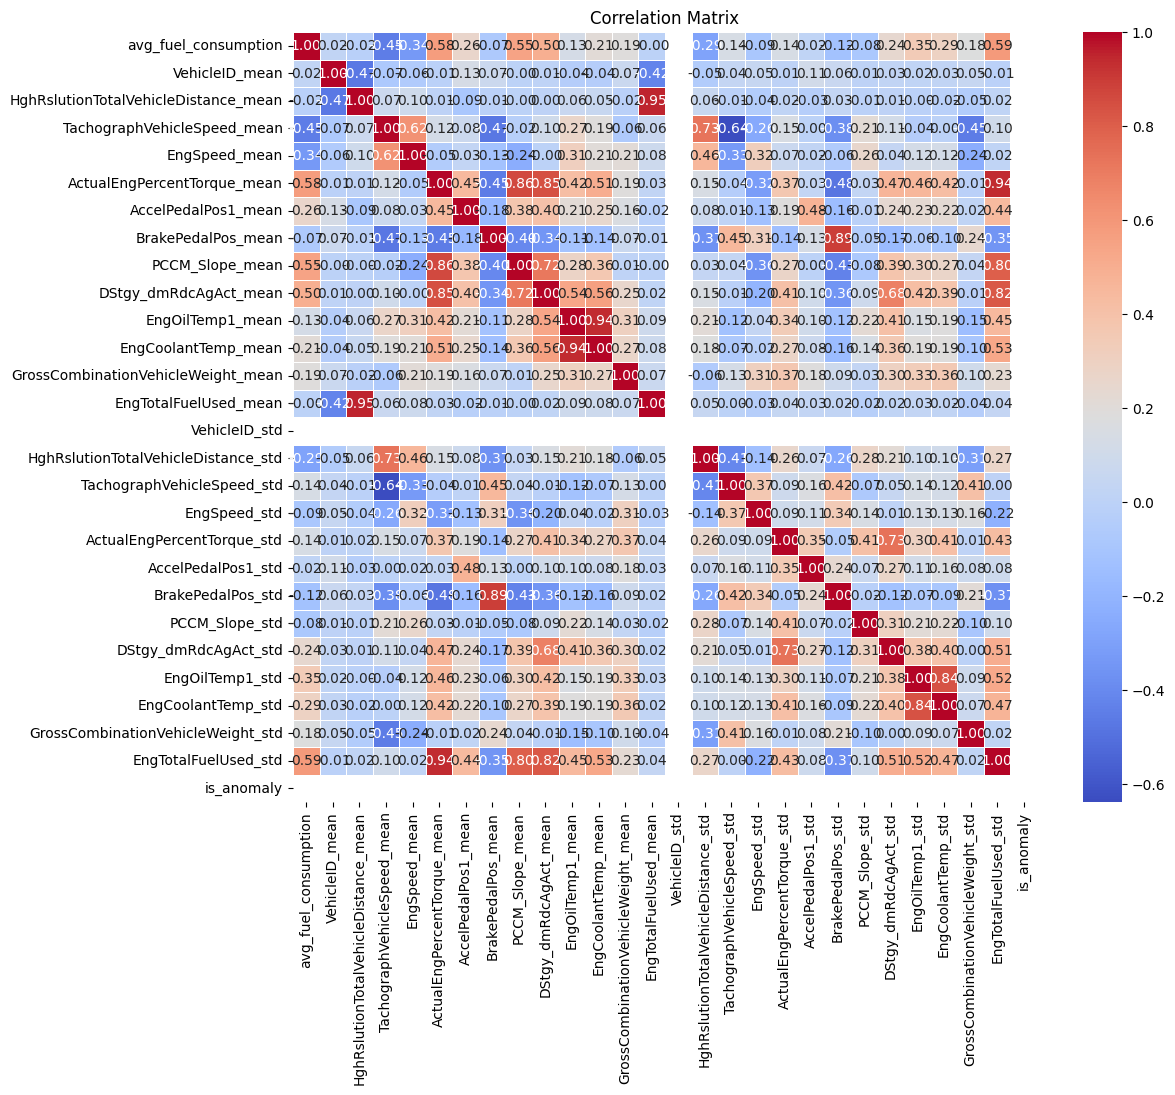

In [ ]:
import seaborn as sns

# Tarih/saat sütunlarını çıkarma
combined_df_non_zero = combined_df_non_zero.select_dtypes(include=[np.number])

# Korelasyon matrisi hesaplama
corr_matrix = combined_df_non_zero.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


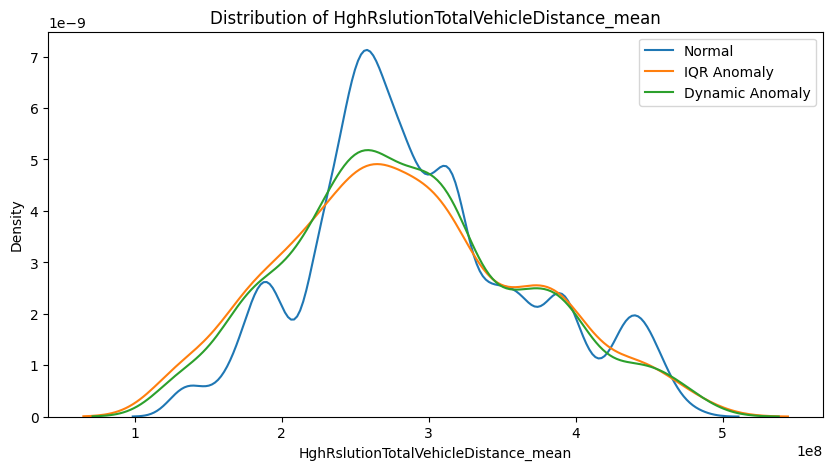

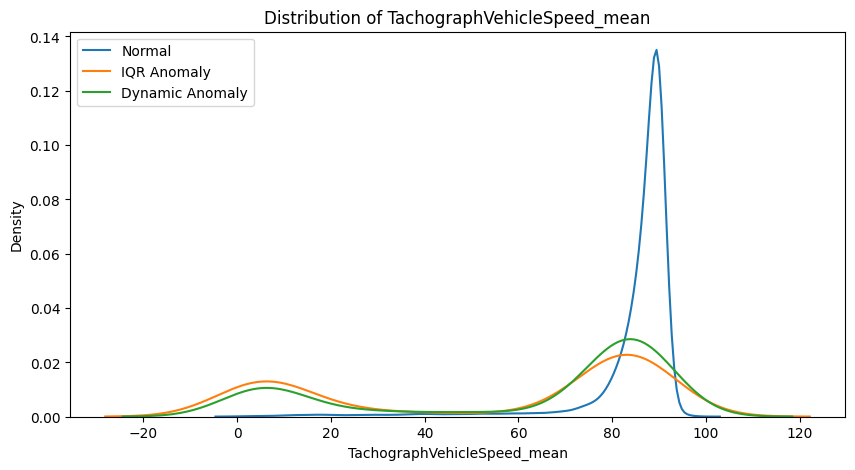

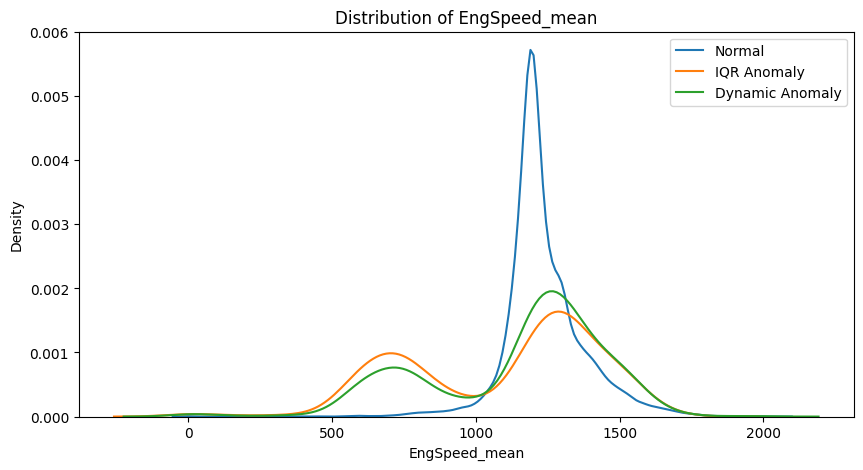

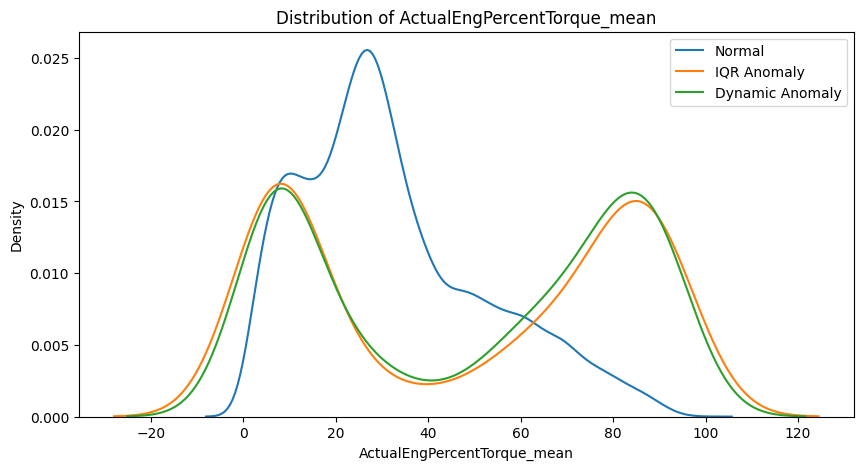

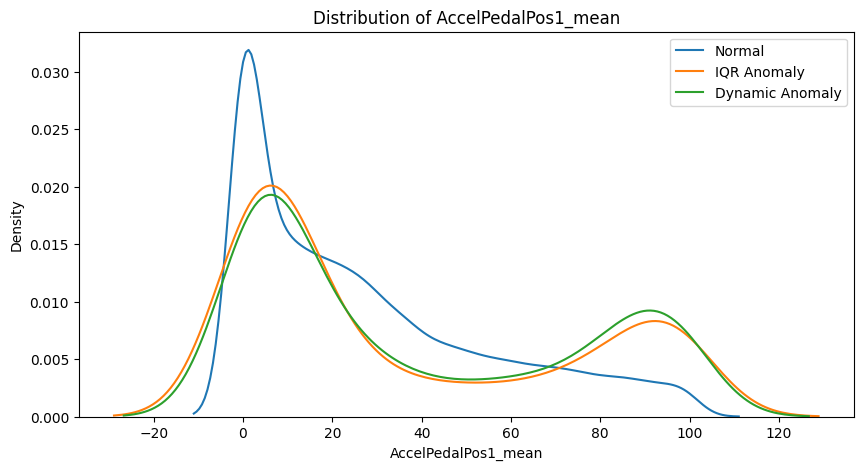

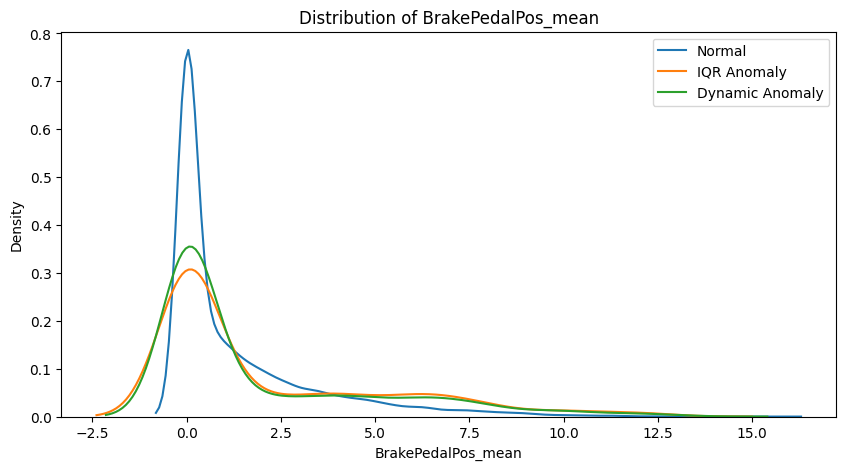

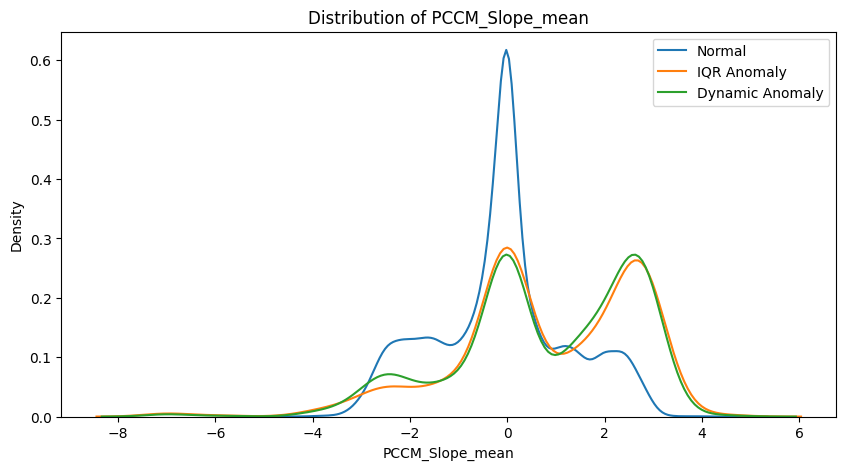

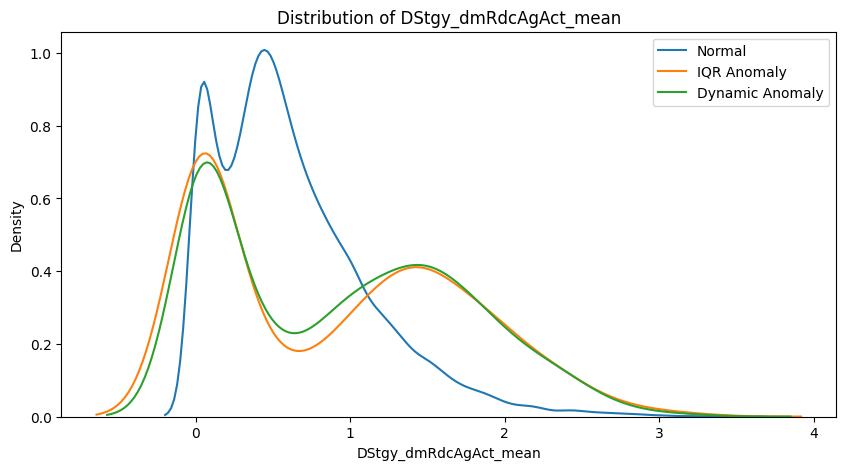

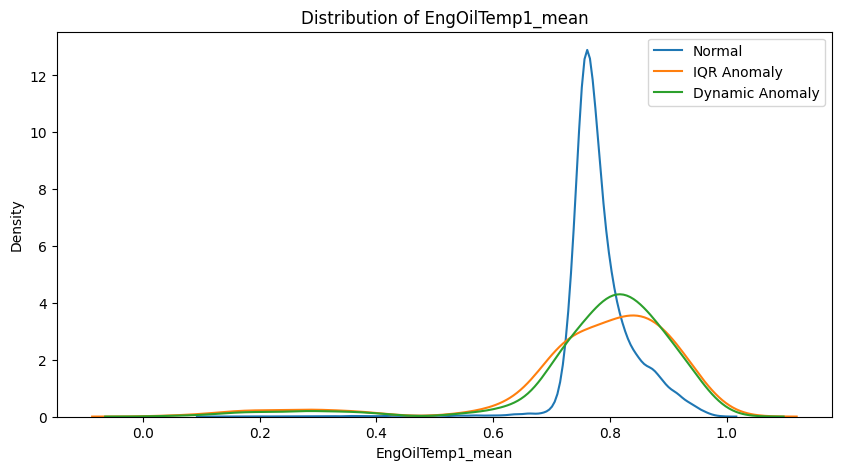

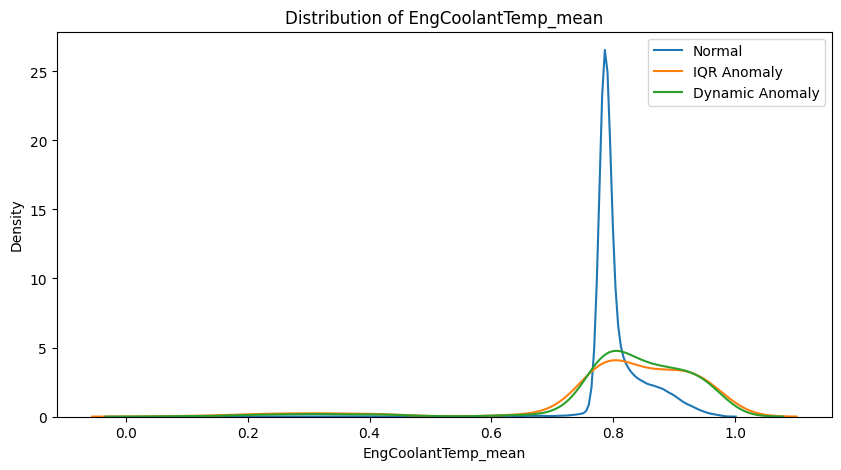

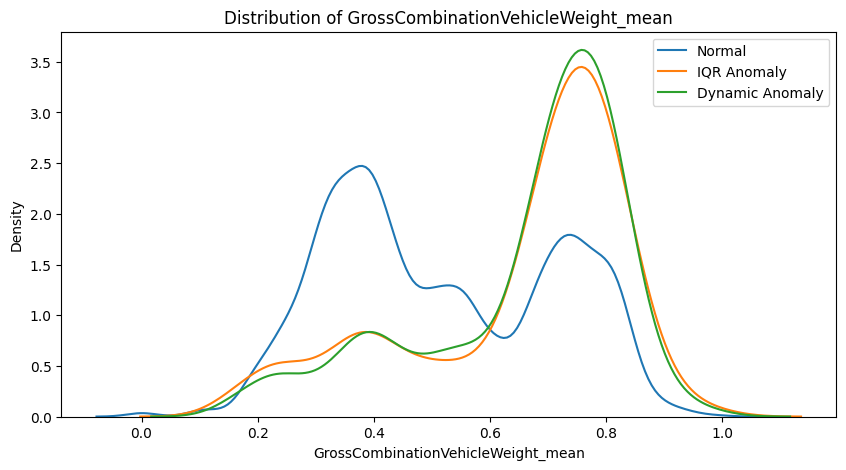

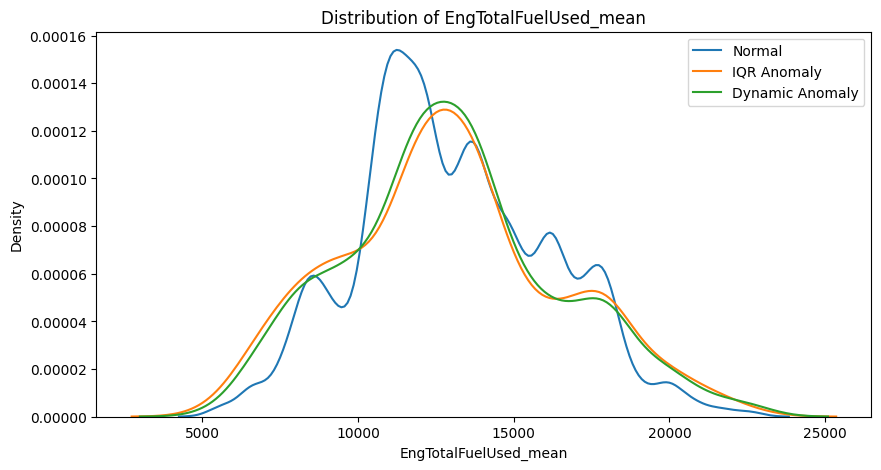

In [ ]:
# Anomali etiketlerini eklemek için veri hazırlama
combined_df_non_zero['is_anomaly_iqr'] = 0
combined_df_non_zero.loc[combined_df_non_zero.index.isin(adjusted_df[adjusted_df['is_anomaly_iqr'] == 1].index), 'is_anomaly_iqr'] = 1

combined_df_non_zero['is_anomaly_dynamic'] = 0
combined_df_non_zero.loc[combined_df_non_zero.index.isin(adjusted_df[adjusted_df['is_anomaly_dynamic'] == 1].index), 'is_anomaly_dynamic'] = 1

# Özellik dağılım analizleri
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(combined_df_non_zero[combined_df_non_zero['is_anomaly_iqr'] == 0][feature], label='Normal')
    sns.kdeplot(combined_df_non_zero[combined_df_non_zero['is_anomaly_iqr'] == 1][feature], label='IQR Anomaly')
    sns.kdeplot(combined_df_non_zero[combined_df_non_zero['is_anomaly_dynamic'] == 1][feature], label='Dynamic Anomaly')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()
